In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics

In [ ]:
#Importing data as Pandas Dataframe
heart_data = pd.read_csv('../input/heart-attack-analysis-prediction-dataset/heart.csv')

# Understanding Dataset

Dataset contains 14 columns. Their details are as follows.

**About this dataset**
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

   Value 1: typical angina
   Value 2: atypical angina
   Value 3: non-anginal pain
   Value 4: asymptomatic
   trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

   Value 0: normal
   Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

*Source : Kaggle*

**Number of Values in Different Age groups**
From the image shown below, it can be seen that age group of 54 to 62 covers a larger portion of data.  

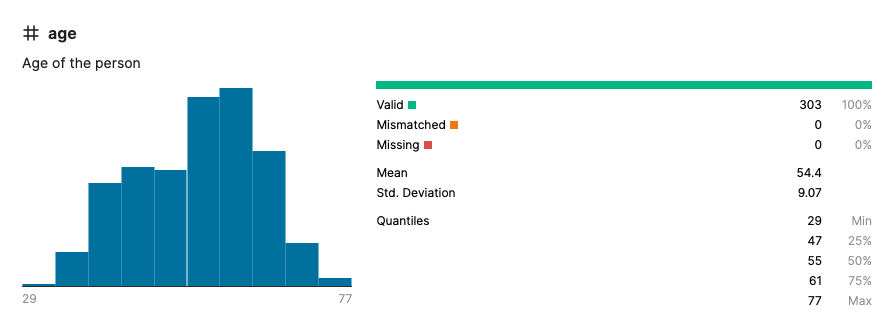

*Source : Kaggle*

**Age vs cholestoral**

Data points of age and cholestoral are plotted in the image below. It should be noted that data of people with cholestoral values above 200 mg/dl at the age group of 40 to 45 has more chance of heart attack. But its not a fair inference provided there is few data points available in the same age group. 

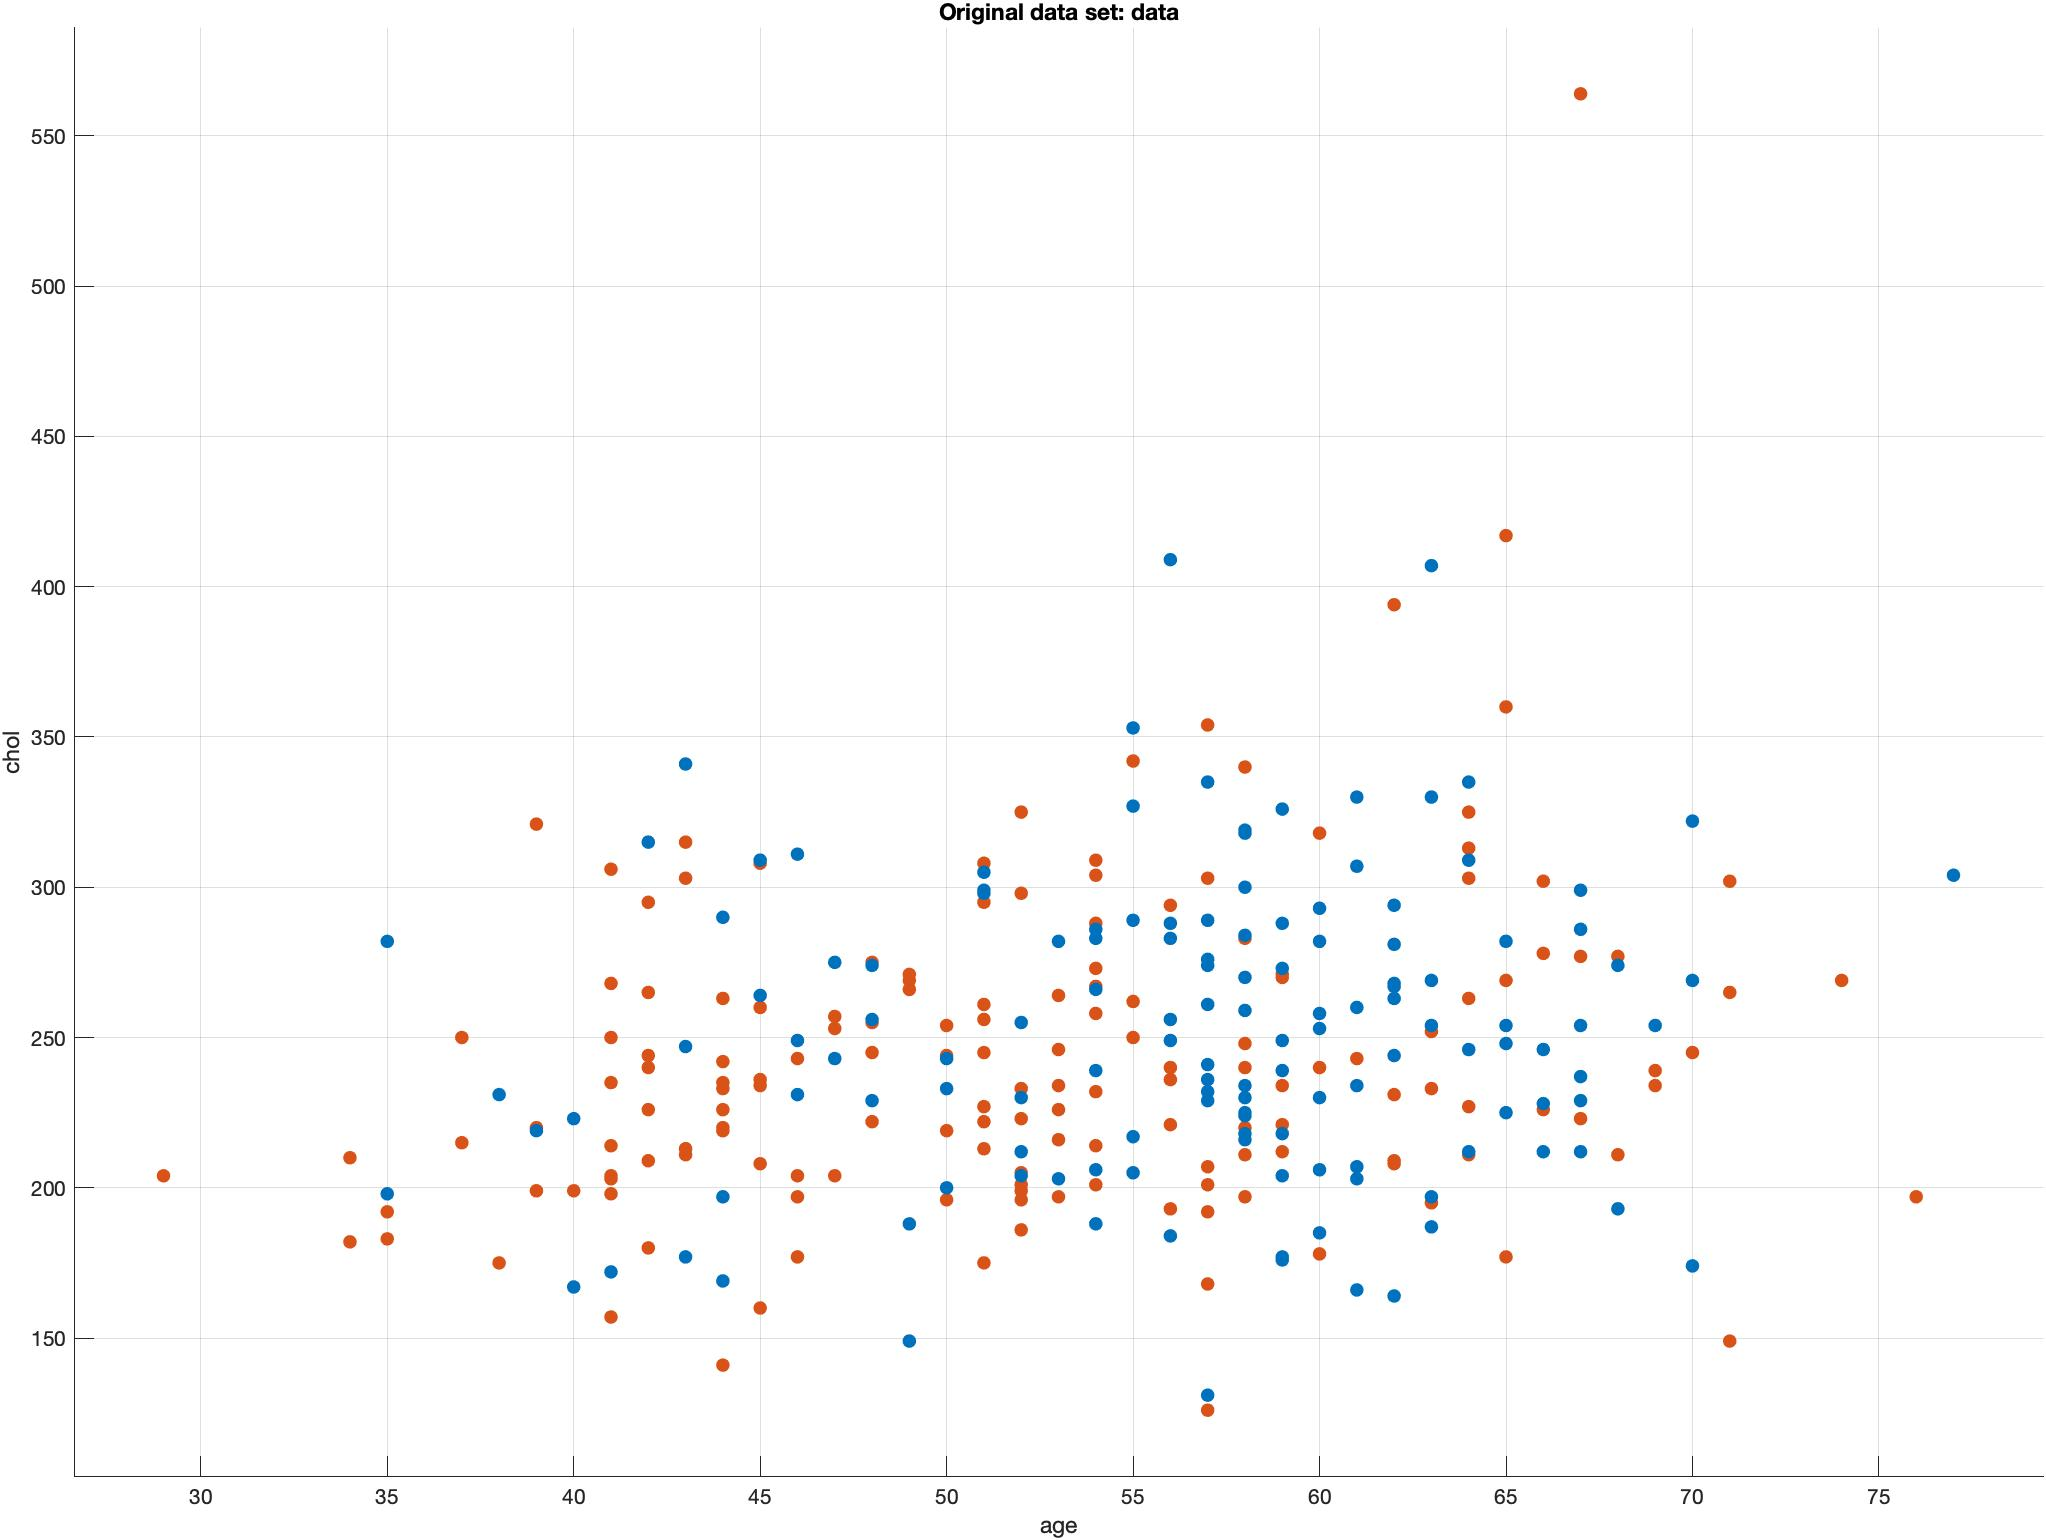

*Red Points -  more chance of heart attack 
Blue Points - less chance of heart attack*
*Source : Image generated from Matlab*

**Cholestoral vs Maximum Heart rate acheived** 
Data points of cholestoral and thalach are plotted in the image below. A fair inference that can be made from the graph is that with higher the value of maximum heart rate, the risk of getting a heart attack gets higher. 

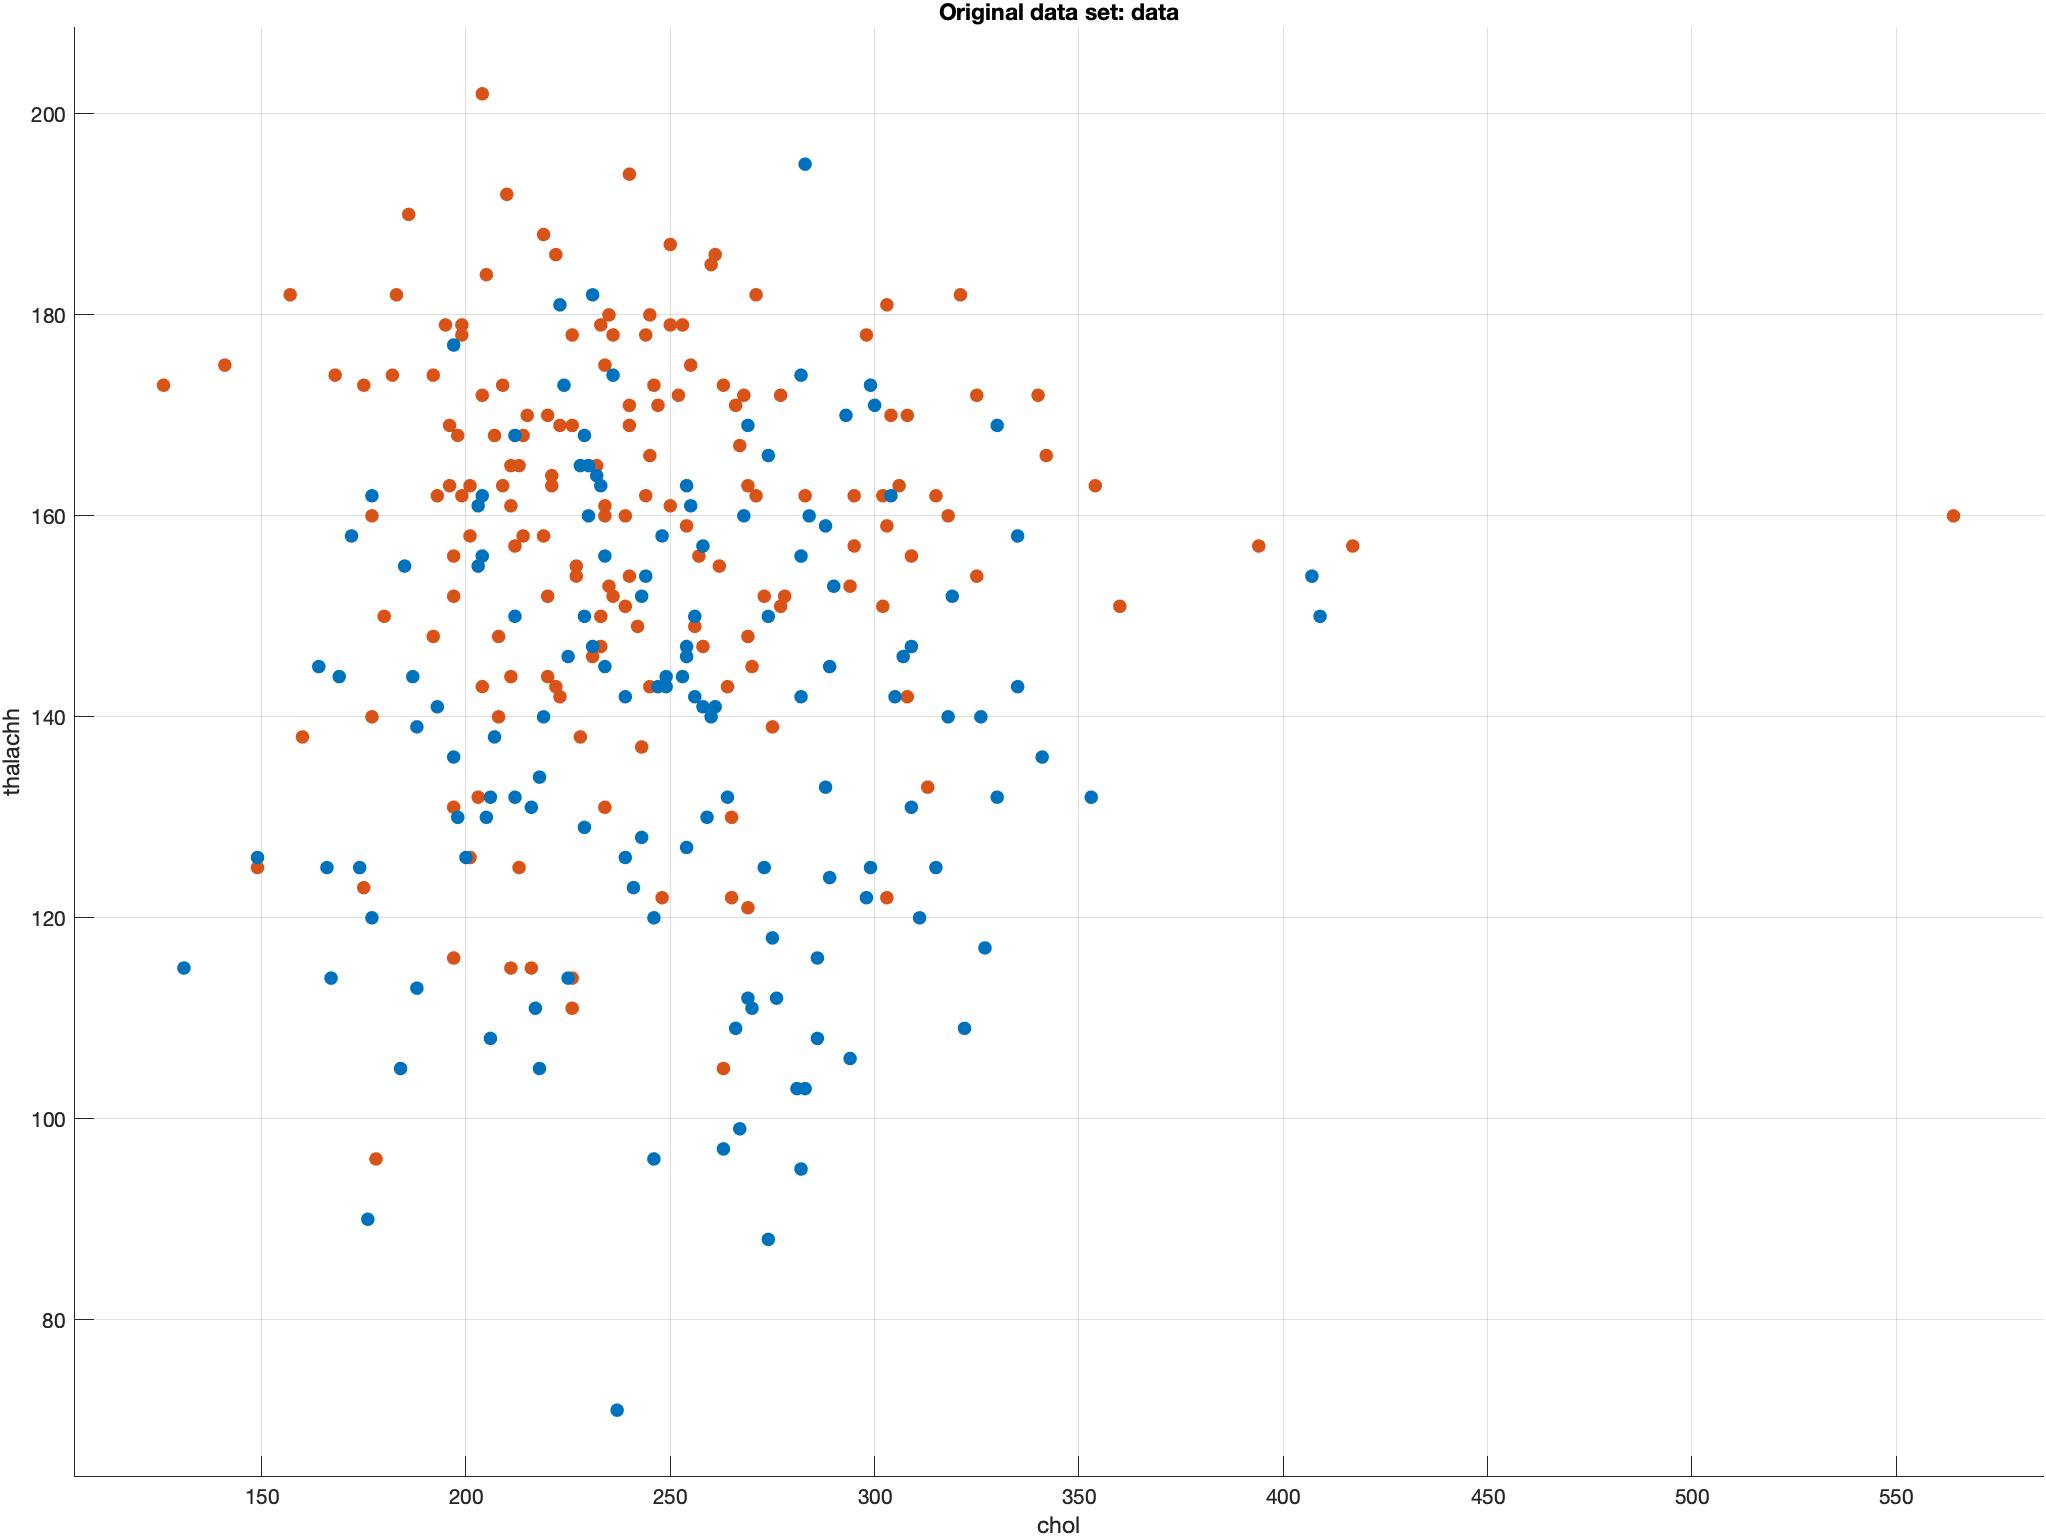

*Red Points -  more chance of heart attack 
Blue Points - less chance of heart attack*
*Source : Image generated from Matlab*

In [ ]:
#Age Plot
plt.figure()
heart_data['age'].value_counts().plot.bar(title='Age')
plt.show()

# Data Preprocessing and Data Split up

**Standardizing**

Data features measured in different scales will carry a bias to the model. Standardizing the features allows rescaling of the elements in the column to be centered around 0. This brings a common scale to all the columns of the dataset. StandardScaler from Scikit-learn preprocessing is applied on each feature of the dataset. 
Reference : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

**Training and Test set**

Dataset is split into training and test set with random data points. test_size represents the size of the test set. In this case, 40 percent of data is classified as test set. random_state shuffles the dataset before spliting. Integer value of random_state is helpful to repreduce the same training and test set on multiple execution. 
Reference : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html



In [ ]:
#Data Preprocessing
X = heart_data.drop(['output'],axis=1)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = heart_data.output

#Data Split up
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=30)

# Training SVM

SVMs are based on finding a hyperplane that applies best for classification of the dataset. SVMs are advantageous in training with small dataset and gives an accurate prediction. But on a dataset with overlapping features, SVMs are less effective.   

In [ ]:
#Training SVM
linearSVM = svm.SVC(kernel='linear',probability=True)
linearSVM.fit(X_train,y_train)

In [ ]:
#Prediction of test Data
Z = linearSVM.predict(X_test)
predict_probabilities = linearSVM.predict_proba(X_test)

# Analysing the trained model

To analyse the model, accuracy, precision and ROC curve is generated using Sklearn metrics. 

In [ ]:
#Analysing the Model
accuracy = metrics.accuracy_score(y_test, Z)
precision = metrics.precision_score(y_test,Z)
fpr,tpr,threshold = metrics.roc_curve(y_test,predict_probabilities[:,1])
roc_auc = metrics.auc(fpr,tpr)
print(f"Accuracy : {accuracy * 100} \nPrecision : {precision*100} \nAUC : {roc_auc*100}")


In [ ]:
#ROC Plot
plt.figure()
plt.title('ROC Plot')
plt.plot(fpr,tpr,'b')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

In [ ]:
#Confusion Matrix
plt.figure()
metrics.plot_confusion_matrix(linearSVM, X_test,y_test)
plt.show()


# Conclusion

With SVM Linear kernal, a model with accuracy of 86% and precision with 89% is modelled. Further, ML performance improvement techniques can be implemented to improve the accuracy rate of the model.

